# Unsupervised Algorithms in Machine Learning Final Project

## Unsupervised learning problem description

In this assignment, I propose to examine the effect that different degrees of dimensionality reduction has on the accuracy of different clustering models (both K-means and Hierarchical). 

To do so, I'll be using the Urban Land Cover dataset from the UC Irvine Machine Learning Repository. (Johnson, Brian. (2014). Urban Land Cover. UCI Machine Learning Repository.). This dataset is comprised of aggregate feature data derived from high-resolution aerial images, which has been sorted into different classes based on what sort of land cover is shown in the image (trees, grass, soil, concrete, asphalt, buildings, cars, pools, and shadows). It has high dimensionality (147 features) relative to the number of instances (168), and so will provide an interesting study in the efficacy of Principal Component Analysis in conjunction with clustering. 

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/urban_land/training.csv")

In [3]:
data.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [4]:
list(data.columns)

['class',
 'BrdIndx',
 'Area',
 'Round',
 'Bright',
 'Compact',
 'ShpIndx',
 'Mean_G',
 'Mean_R',
 'Mean_NIR',
 'SD_G',
 'SD_R',
 'SD_NIR',
 'LW',
 'GLCM1',
 'Rect',
 'GLCM2',
 'Dens',
 'Assym',
 'NDVI',
 'BordLngth',
 'GLCM3',
 'BrdIndx_40',
 'Area_40',
 'Round_40',
 'Bright_40',
 'Compact_40',
 'ShpIndx_40',
 'Mean_G_40',
 'Mean_R_40',
 'Mean_NIR_40',
 'SD_G_40',
 'SD_R_40',
 'SD_NIR_40',
 'LW_40',
 'GLCM1_40',
 'Rect_40',
 'GLCM2_40',
 'Dens_40',
 'Assym_40',
 'NDVI_40',
 'BordLngth_40',
 'GLCM3_40',
 'BrdIndx_60',
 'Area_60',
 'Round_60',
 'Bright_60',
 'Compact_60',
 'ShpIndx_60',
 'Mean_G_60',
 'Mean_R_60',
 'Mean_NIR_60',
 'SD_G_60',
 'SD_R_60',
 'SD_NIR_60',
 'LW_60',
 'GLCM1_60',
 'Rect_60',
 'GLCM2_60',
 'Dens_60',
 'Assym_60',
 'NDVI_60',
 'BordLngth_60',
 'GLCM3_60',
 'BrdIndx_80',
 'Area_80',
 'Round_80',
 'Bright_80',
 'Compact_80',
 'ShpIndx_80',
 'Mean_G_80',
 'Mean_R_80',
 'Mean_NIR_80',
 'SD_G_80',
 'SD_R_80',
 'SD_NIR_80',
 'LW_80',
 'GLCM1_80',
 'Rect_80',
 'GLCM2_8

In [5]:
print("Number of features in the data: ", len(data.columns))

Number of features in the data:  148


From the metadata provided on the UCI Machine Learning Repository website:

*Classification of urban land cover using high resolution aerial imagery. Intended to assist sustainable urban planning efforts.*

*Class: Land cover class (nominal)<br>
BrdIndx: Border Index (shape variable) <br>
Area: Area in m2 (size variable)<br>
Round: Roundness (shape variable)<br>
Bright: Brightness (spectral variable)<br>
Compact: Compactness (shape variable)<br>
ShpIndx: Shape Index (shape variable)<br>
Mean_G: Green (spectral variable)<br>
Mean_R: Red (spectral variable)<br>
Mean_NIR: Near Infrared (spectral variable)<br>
SD_G: Standard deviation of Green (texture variable) <br>
SD_R: Standard deviation of Red (texture variable)<br>
SD_NIR: Standard deviation of Near Infrared (texture variable)<br>
LW: Length/Width (shape variable)<br>
GLCM1: Gray-Level Co-occurrence Matrix (texture variable)<br>
Rect: Rectangularity (shape variable)<br>
GLCM2: Another Gray-Level Co-occurrence Matrix attribute (texture variable)<br>
Dens: Density (shape variable)<br>
Assym: Assymetry (shape variable)<br>
NDVI: Normalized Difference Vegetation Index (spectral variable)<br>
BordLngth: Border Length (shape variable)<br>
GLCM3: Another Gray-Level Co-occurrence Matrix attribute (texture variable)*

*Note: These variables repeat for each coarser scale (i.e. variable_40, variable_60, ...variable_140).*



There are a total of 147 variables, all of which are repetitions of the same set of 21 optical variables of aerial images repeated over 7 scales (resolutions). 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


The target variable, "class", is the only categorical variable in the dataset, and records the type of object that was observed:

In [7]:
data['class'].unique()

array(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '], dtype=object)

The data contains no null values:

In [8]:
data.isnull().sum().sum()

0

And there are no 0 values (often used as a default null for numerical data where 0 could have no logical interpretation):

In [9]:
X_train = data.drop(['class'], axis = 1)
y_train = data.loc[:, 'class']

for col in X_train.columns:
    print(col, "min: ", X_train.loc[:, col].min())

BrdIndx min:  1.0
Area min:  10
Round min:  0.02
Bright min:  37.67
Compact min:  1.0
ShpIndx min:  1.06
Mean_G min:  30.68
Mean_R min:  32.21
Mean_NIR min:  40.12
SD_G min:  4.33
SD_R min:  3.22
SD_NIR min:  2.72
LW min:  1.0
GLCM1 min:  0.09
Rect min:  0.22
GLCM2 min:  4.34
Dens min:  0.62
Assym min:  0.02
NDVI min:  -0.36
BordLngth min:  14
GLCM3 min:  1225.78
BrdIndx_40 min:  1.0
Area_40 min:  32
Round_40 min:  0.02
Bright_40 min:  40.91
Compact_40 min:  1.0
ShpIndx_40 min:  1.06
Mean_G_40 min:  33.73
Mean_R_40 min:  33.34
Mean_NIR_40 min:  42.47
SD_G_40 min:  6.04
SD_R_40 min:  3.43
SD_NIR_40 min:  3.43
LW_40 min:  1.0
GLCM1_40 min:  0.09
Rect_40 min:  0.16
GLCM2_40 min:  5.38
Dens_40 min:  0.4
Assym_40 min:  0.06
NDVI_40 min:  -0.34
BordLngth_40 min:  24
GLCM3_40 min:  638.56
BrdIndx_60 min:  1.0
Area_60 min:  32
Round_60 min:  0.02
Bright_60 min:  41.2
Compact_60 min:  1.0
ShpIndx_60 min:  1.06
Mean_G_60 min:  33.92
Mean_R_60 min:  35.36
Mean_NIR_60 min:  43.94
SD_G_60 min:  6.1

I chose this data for the challenges that it would represent due to its high dimensionality. In terms of EDA, this dimensionality presents some challenges to our exploratory data analysis. 

To get a better idea of the shape and scale of the data, we'll look at a few slices of the features to try and get an idea of the trends at play. 

First, we'll try zooming in on a single attribute, Shape Index, to see how it changes over the various resolutions:

In [10]:
# Creating sub-datasets of observation of the same variable at different resolutions

X_by_feature_group = []
for i in range(len(X_train.columns[:21])):
    X_by_feature_group.append(X_train.loc[:, [col for col in X_train.columns if X_train.columns[i] in col]])
    


In [11]:
X_train.columns[:21]

Index(['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G',
       'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect',
       'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3'],
      dtype='object')

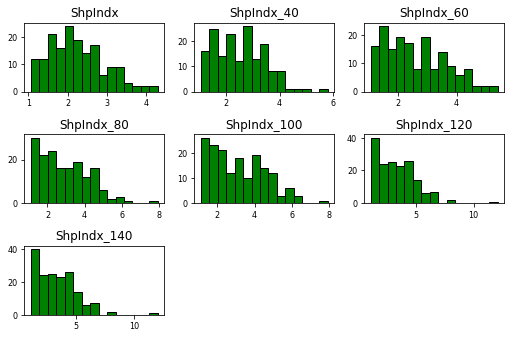

In [12]:
X_by_feature_group[5].hist(bins = 15, color = 'green', 
                           edgecolor = 'black', 
                           linewidth = 1.0, 
                           xlabelsize = 8, 
                           ylabelsize = 8, 
                           grid = False)

plt.tight_layout(rect = (0, 0, 1.2, 1.2))

We see that while the trend of the data is similar across the various resolutions, each subplot has some marked differences. 

The fact seems to hold when we choose another attribute:

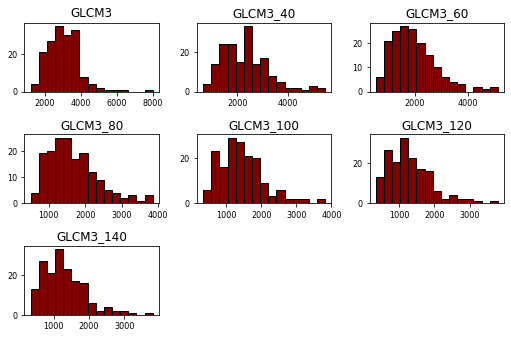

In [13]:
X_by_feature_group[20].hist(bins = 15, color = 'maroon', 
                           edgecolor = 'black', 
                           linewidth = 1.0, 
                           xlabelsize = 8, 
                           ylabelsize = 8, 
                           grid = False)

plt.tight_layout(rect = (0, 0, 1.2, 1.2))

This suggests that simply taking the mean of the features would sacrifice valuable information. Later on, we'll attempt to reduce dimensionality with Principal Component Analysis instead. 

Next, we'll look at each of the feature slices to determine whether there are any glaring outliers in the data. 

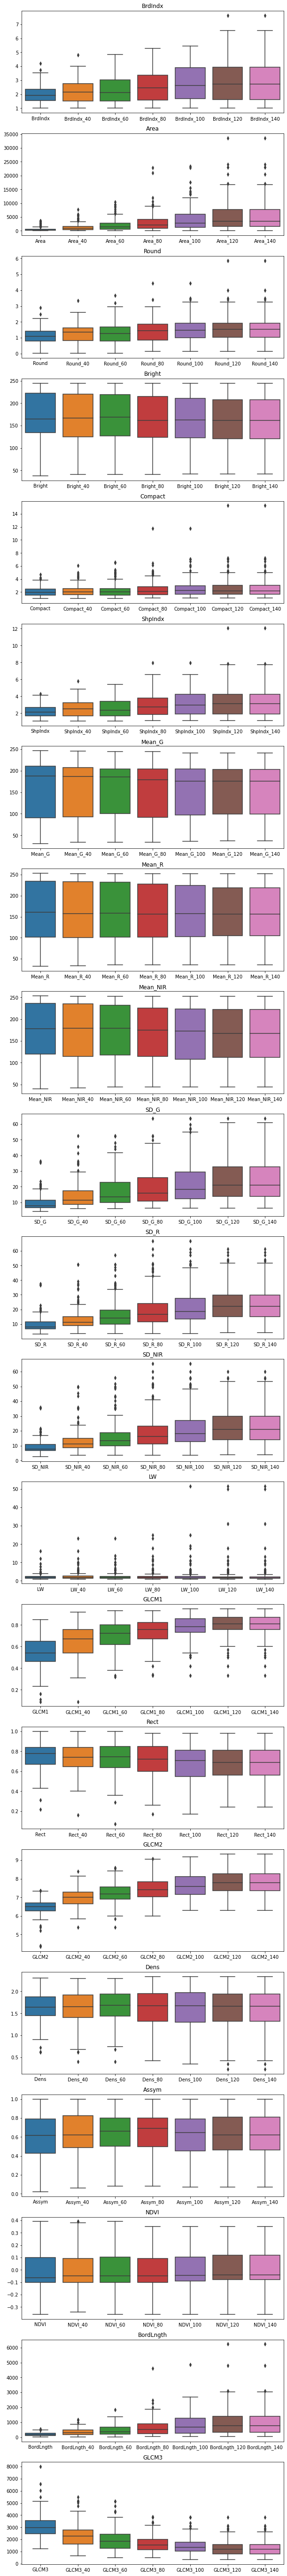

In [14]:
f, axs = plt.subplots(21, 1, figsize = (10, 100))

for i in range(len(X_by_feature_group)):
    sns.boxplot(data = X_by_feature_group[i], ax = axs[i])
    axs[i].set_title(X_by_feature_group[i].columns[0])
    
plt.show()

We see that there are certainly some upper outliers present in a few of the features (notably in "Area", "Round", "Compact", "ShpIndx", "SD", "LW", "BordLngth", and "GLCM3"), as well as lower outliers (particularly in "GLCM2", "Rect", and "GLCM1"). 

I'm initially hesitant to replace or impute those outliers, however - inspecting the training data further, we see that there are very few instances for each target class, which makes it somewhat difficult to determine if those are truly outliers or are are marked as such due to the low number of instances available. 

In [15]:
y_train.value_counts()

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64

Let's next examine the correlations between various variables in the dataset. Let's first look at the correlations the same measurement taken at different resolution levels:

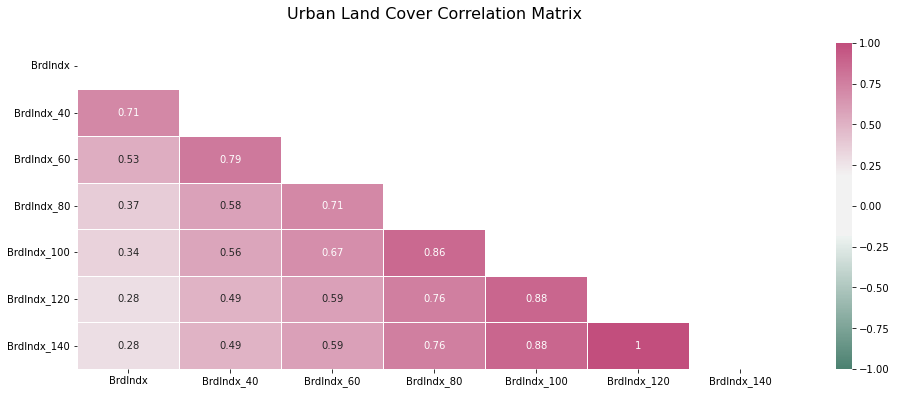

In [16]:
plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(X_by_feature_group[0].corr(), 
                            dtype = np.bool_))
cmap = sns.diverging_palette(162, 
                              350, 
                              s = 60, 
                              l = 50, 
                              sep = 48, 
                              n = 16,
                              as_cmap = True)
heatmap = sns.heatmap(X_by_feature_group[0].corr(), 
                      mask = mask, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True,
                      cmap = cmap, 
                      linewidths = 0.5)
heatmap.set_title('Urban Land Cover Correlation Matrix', 
                  fontdict = {'fontsize':16}, 
                  pad = 24)
plt.show()

As expected, the plot shows a graded correlation between these features, with a feature having the greatest correlation between the features measured at similar resolution levels (that is, BrdIndx_140 is more highly correlated with BrdIndx_120 than with Brd_Indx_40). 

Next, to get an idea of the relationships between variables, we'll plot a correlation matrix for all of the features in the first resolution level:

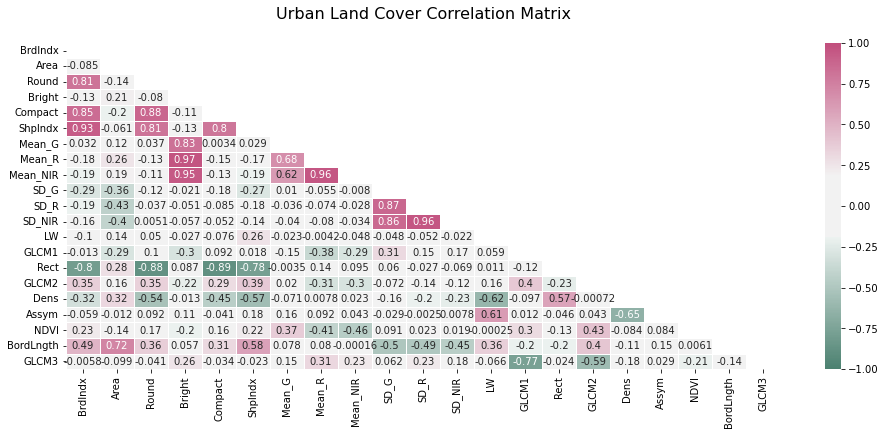

In [17]:
plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(X_train.iloc[:, :21].corr(), 
                            dtype = np.bool_))
cmap = sns.diverging_palette(162, 
                              350, 
                              s = 60, 
                              l = 50, 
                              sep = 48, 
                              n = 16,
                              as_cmap = True)
heatmap = sns.heatmap(X_train.iloc[:, :21].corr(), 
                      mask = mask, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True,
                      cmap = cmap, 
                      linewidths = 0.5)
heatmap.set_title('Urban Land Cover Correlation Matrix', 
                  fontdict = {'fontsize':16}, 
                  pad = 24)
plt.show()

We can see some similarly intuitive correlations here. From the metadata provided, we know that the features of the dataset can be broadly classified into spectral, size, shape, and texture - related variables. As expected, the largest positive correlations occur between features of the same classification - for example, between "Mean_R" and "Bright" (both of which are spectral variables), or between "SD_NIR" and "SD_R" (both of which are texture variables). Negative correlations follow the same pattern - for example between "Rect" and "Compact" (both shape variables), or between "GLCM1" and "GLCM3" (both texture variables).

This will be salient information as we work with reducing the dimensionality of the data - it will be interesting to see what the most effective reduction will be, whether to 21 dimensions (the number of features, independent of image resolutions), 4 (the number of variable types, broadly speaking), or some other number to be determined. 

## Dimensionality Reduction using Principal Component Analysis

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Having completed our initial inspection of the data, I want to try a dimensionality-reduction technique, Principal Component Analysis, to project our 148 features into a lower-dimensional space before training our clustering models. 

We start by scaling the data using sklearn's StandardScaler:

In [19]:
def standardize (X):
    # Input X: input data
    # output X_std: Standardized features using StandardScaler
    
    scaler = StandardScaler().fit(X)
    X_std = scaler.transform(X)
    return X_std

In [20]:
X_std = standardize(X_train)

Next, we'll project the data into a lower dimensional space using sklearn's PCA class. We'll first keep all components and inspect the output of the explained_variance_ attribute. 

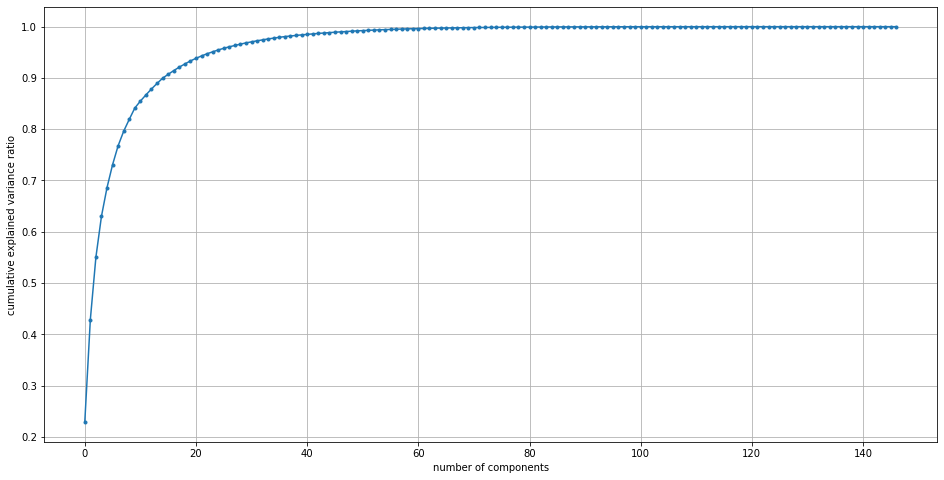

cumulative explained variance ratio for 4 components: 0.63
cumulative explained variance ratio for 5 components: 0.686
cumulative explained variance ratio for 6 components: 0.731
cumulative explained variance ratio for 15 components: 0.899
cumulative explained variance ratio for 21 components: 0.938


In [21]:
pca_all = PCA().fit(X_std)
cum_exp_var_all = np.cumsum(pca_all.explained_variance_ratio_)

plt.figure(figsize = (16,8))
plt.plot(cum_exp_var_all, '.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance ratio')
plt.grid('True')
plt.show()

comp_vec = [4, 5, 6, 15, 21]

for comp in comp_vec:
    print(f'cumulative explained variance ratio for {comp} components: {cum_exp_var_all[comp-1].round(3)}')
    
    

In [22]:
pca_all.explained_variance_ratio_[:25]

array([0.22878812, 0.19995157, 0.12161947, 0.07980984, 0.05599154,
       0.04467404, 0.03698105, 0.02831709, 0.02310359, 0.02206525,
       0.01356426, 0.01207711, 0.01160461, 0.01075781, 0.01016337,
       0.00761708, 0.00724089, 0.00677236, 0.00619219, 0.00583536,
       0.00518338, 0.00459423, 0.00429992, 0.00378162, 0.00363145])

This plot shows that we reach a rather high explained variance ratio rather early on. 70% explained variance is achieved with 6 components, and we reach the 90% with only 16 components. Interestingly, it appears that the optimal number of components doesn't necessarily correspond to the real-world feature groupings that we had described above - that is, there isn't a marked jump in the explained variance for 4 components (the number of variable classes) or for 21 components (the number of features that are measured at each resolution). Since the curve is so smooth, we have a great number of options when selecting the number of components to use for our dimensionality reduction. Nevertheless, we'll adhere to the groupings that we've already established: 4 and 21, which give us an explained variance ratio of 63.0% and 93.8%, respectively. 

In [23]:
X_red_4 = PCA(n_components=4).fit_transform(X_std)
X_red_21 = PCA(n_components=21).fit_transform(X_std)

## Model Building and Training

Model building and training may depend on their data type(s) and task type(s). Depending on your project, you may have one model or more. Generally, it is deemed a higher quality project if you compare multiple models and show your understanding of why specific models work better than the other or what limitations or cautions specific models may have. When using multiple models, at least one of them should be an unsupervised approach. 

For machine learning models, another recommendation is to show enough effort on the hyperparameter optimization.

For this project, I chose to compare the performance of the two unsupervised clustering models that we've learned in this course (K-means and hierarchical) to examine how they perform at different degrees of dimensionality (full, 21, and 4).

In [24]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from timeit import Timer
import itertools

### K-means clustering

To begin, we'll choose the simplest of the two models, K-means, and train both our full standardized training dataset as well as the two reduced sets, and compare the time that the model takes to train. K-means has the added benefit of having essentially no hyperparameters to train, since we already know the different classes (clusters) that we'll be classifying each instance into.

In [25]:
n_classes = len(y_train.unique())
label_list = y_train.unique()
print("classes: ", label_list)
print("number of classes in target variable: ", n_classes)

classes:  ['car ' 'concrete ' 'tree ' 'building ' 'asphalt ' 'grass ' 'shadow '
 'soil ' 'pool ']
number of classes in target variable:  9


Just to check, let's take a look at the elbow plot to see what the data suggests as the optimal number of clusters, using the full standardized data:

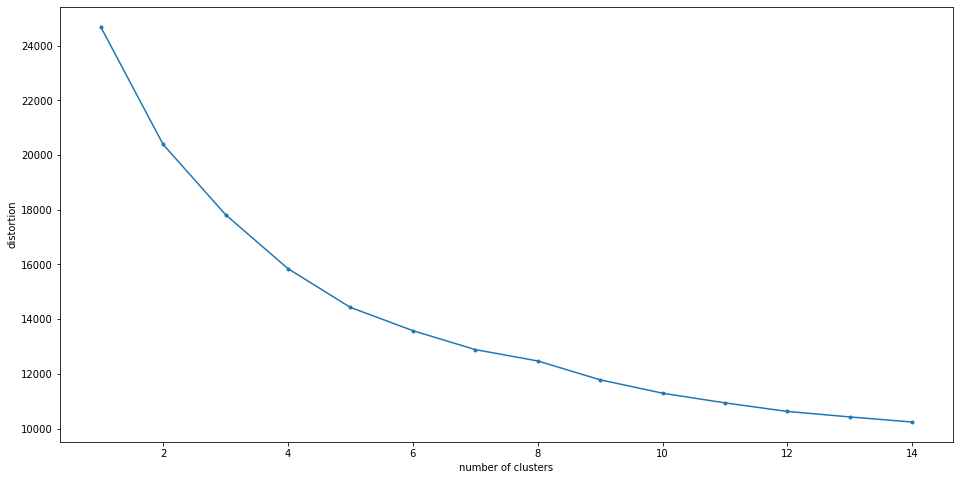

In [26]:
distortions = []
K = range(1,15)
for k in K: 
    km_model = KMeans(n_clusters = k)
    km_model.fit(X_std)
    distortions.append(km_model.inertia_)
plt.figure(figsize = (16, 8))
plt.plot(K, distortions, '.-')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

Interestingly, there's little to no distinct elbow here, illustrating the drawbacks of this method. If we were performing a wholly unsupervised analysis (that is, where we didn't know how many categories were present), then we might want to plot the distortion of a validation set alongside to ensure that the model didn't overfit at a certain number of predictors. Given our pre-existing knowledge, we continue with 9 clusters. 

In [27]:
km_mod = KMeans(n_clusters = n_classes, random_state = 12)
y_pred_km_full = km_mod.fit_predict(X_std)
y_pred_km_21 = km_mod.fit_predict(X_red_21)
y_pred_km_4 = km_mod.fit_predict(X_red_4)

Since the KMeans model returns integer values, we'll use a comparative permutation method to map those predictions onto the most likely classes. 

In [28]:
def label_permute_compare(yt, yp, labels):
    # Input yt: true target variable
    # Input yp: predicted target variable
    # Input labels: a list of the origibal labels
    # Output label_dict: a dictionary mapping predicted values to original labels
    
    best_label_set = ()
    best_acc = 0 
    curr_acc = 0
    perms = list(itertools.permutations(range(0, len(labels))))
    for perm in perms: 
        curr_acc = accuracy_score(yt.replace(labels, perm), yp)
        if curr_acc > best_acc:
            best_acc = curr_acc
            best_label_set = perm
    label_dict = dict(zip(best_label_set, labels))
    return label_dict

In [29]:
label_dict_km_full = label_permute_compare(y_train, y_pred_km_full, label_list)
y_pred_km_full = [label_dict_km_full[pred] for pred in y_pred_km_full]

In [30]:
label_dict_km_21 = label_permute_compare(y_train, y_pred_km_21, label_list)
y_pred_km_21 = [label_dict_km_21[pred] for pred in y_pred_km_21]

In [31]:
label_dict_km_4 = label_permute_compare(y_train, y_pred_km_4, label_list)
y_pred_km_4 = [label_dict_km_4[pred] for pred in y_pred_km_4]

### Hierarchical clustering

Next, we apply a hierarchical clustering model to the data for comparative depth. Our first step will be to tune the hyperparameters in order to find the best combination of linkage and distance metrics for this data. We'll do this by iterating through all possible combinations in a for loop, using our original, unmodified training data. 

In [32]:
def hierarchical_tuning (X, y, label_dict, n_clusters):
    # input X: the training data
    # input y: the training labels
    # input label_dict: a dictionary mapping predicted labels on original labels
        
    best_mod = None
    best_acc = 0
    best_metric = ''
    best_linkage = ''
    curr_mod = None
    curr_acc = 0

    linkages = ['ward', 'complete', 'average', 'single']
    metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

    for linkage in linkages:
        for metric in metrics: 
            try:
                y_pred = AgglomerativeClustering(n_clusters = n_clusters, 
                                                 affinity = metric, 
                                                 linkage = linkage).fit_predict(X)
                y_pred = [label_dict[pred] for pred in y_pred]
                curr_acc = accuracy_score(y, y_pred)
                
                print('linkage: ', linkage)
                print('metric: ', metric)
                print('accuracy: ', curr_acc)
                print('\n')
            
                if curr_acc > best_acc:
                    best_acc = curr_acc
                    best_metric = metric
                    best_linkage = linkage
                    
            except ValueError:
                pass
            
            
                
    return best_acc, best_metric, best_linkage

In [33]:
init_hc_mod = AgglomerativeClustering(n_clusters = n_classes)
y_pred_init = init_hc_mod.fit_predict(X_std)

label_dict_hc = label_permute_compare(y_train, y_pred_init, label_list)

In [34]:
result = hierarchical_tuning(X_std, y_train, label_dict_hc, 9)
result

linkage:  ward
metric:  euclidean
accuracy:  0.625


linkage:  complete
metric:  euclidean
accuracy:  0.1130952380952381


linkage:  complete
metric:  l1
accuracy:  0.05357142857142857


linkage:  complete
metric:  l2
accuracy:  0.1130952380952381


linkage:  complete
metric:  manhattan
accuracy:  0.05357142857142857


linkage:  complete
metric:  cosine
accuracy:  0.23809523809523808


linkage:  average
metric:  euclidean
accuracy:  0.08928571428571429


linkage:  average
metric:  l1
accuracy:  0.16071428571428573


linkage:  average
metric:  l2
accuracy:  0.08928571428571429


linkage:  average
metric:  manhattan
accuracy:  0.16071428571428573


linkage:  average
metric:  cosine
accuracy:  0.23809523809523808


linkage:  single
metric:  euclidean
accuracy:  0.17857142857142858


linkage:  single
metric:  l1
accuracy:  0.17261904761904762


linkage:  single
metric:  l2
accuracy:  0.17857142857142858


linkage:  single
metric:  manhattan
accuracy:  0.17261904761904762


linkage:  single

(0.625, 'euclidean', 'ward')

From these results, it appears that the euclidean metric using the ward linkage gives us the best performance. We'll move forward and use these hyperparameters in our final models. 

In [35]:
hc_mod = AgglomerativeClustering(n_clusters = n_classes, 
                                 affinity = 'euclidean', 
                                 linkage = 'ward')
y_pred_hc_full = hc_mod.fit_predict(X_std)
y_pred_hc_21 = hc_mod.fit_predict(X_red_21)
y_pred_hc_4 = hc_mod.fit_predict(X_red_4)

In [36]:
label_dict_hc_full = label_permute_compare(y_train, y_pred_hc_full, label_list)
y_pred_hc_full = [label_dict_hc_full[pred] for pred in y_pred_hc_full]

In [37]:
label_dict_hc_21 = label_permute_compare(y_train, y_pred_hc_21, label_list)
y_pred_hc_21 = [label_dict_hc_21[pred] for pred in y_pred_hc_21]

In [38]:
label_dict_hc_4 = label_permute_compare(y_train, y_pred_hc_4, label_list)
y_pred_hc_4 = [label_dict_hc_4[pred] for pred in y_pred_hc_4]

## Results

Now that we've developed our six final sets of predictions (developed with training data using the full set of features as well as for PCA-reduced data to 21 and 4 featues), we move on to evaluate the accuracy of the predictions in each case. 

In [39]:
y_train.value_counts()

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64

As we can see from the above breakdown of the values of the training datasets, the data isn't particularly imbalanced - the number of each predicted class only varies from 14 to 29. Thus, we can continue using accuracy as our preferred classification metric. 

In [42]:
print('K-Means predictive accuracy:', '\n')
print('\t', 'full dataset: ', accuracy_score(y_train, y_pred_km_full))
print('\t', 'PCA (21 components) dataset: ', accuracy_score(y_train, y_pred_km_21))
print('\t', 'PCA (4 components) dataset: ', accuracy_score(y_train, y_pred_km_4))

K-Means predictive accuracy: 

	 full dataset:  0.5892857142857143
	 PCA (21 components) dataset:  0.5476190476190477
	 PCA (4 components) dataset:  0.6488095238095238


In [43]:
print('Hierarchical predictive accuracy:', '\n')
print('\t', 'full dataset: ', accuracy_score(y_train, y_pred_hc_full))
print('\t', 'PCA (21 components) dataset: ', accuracy_score(y_train, y_pred_hc_21))
print('\t', 'PCA (4 components) dataset: ', accuracy_score(y_train, y_pred_hc_4))

Hierarchical predictive accuracy: 

	 full dataset:  0.625
	 PCA (21 components) dataset:  0.6071428571428571
	 PCA (4 components) dataset:  0.6190476190476191


## Conclusion

Very interesting results! We see here that our PCA dimensionality reduction had mixed performance. The clear winner, in terms of outright accuracy, is the K-means clustering model with the highest amount of dimensionality reduction (4 components). It's interesting to note that it's not necessarily a smooth decrease. A K-means model trained on the full suite of available features (147) actually performed better than a dataset that had undergone a substantial PCA reduction to 21 features. 

Hierarchical clustering performed best on the full suite of features. Once again, the PCA reduction to 21 features worsened the predictive accuracy, and increased slightly with a further reduction to 4 features. 

A more robust study could go further in this analysis by looking at the performance of other numbers of components in the PCA reduction. My chosen parameters - 147, 21, and 4 components - was based solely on descriptions of the dataset and the makeup of the features at play, and it's highly possible that other degrees of dimensionality reduction could yield better results when subjected to a clustering analysis. 

Overall, it should be noted that the predictive accuracy of both  K-means and Hierarchical clustering are somewhat disappointing in this case. A maximum accuracy of 64.8% is far from optimal. As my original intent with this project was not to find the best model but simply to compare and contrast the effect of different degrees of dimensionality reduction on clustering model accuracy, it's not a point of great concern here. 

While it's difficult to parse exactly why clustering underperformed on this dataset, it's probably the result of several factors. The few training instances (168) doesn't give us much to work with from the start. And of course it's possible that clustering analysis is  simply not a good fit for this data. It's not always the case that we can successfully shoehorn a single family of models to accurately predict the behavior of any particular dataset, no matter what hyperparameters we select. If this were a real-world setting and the dataset were larger, exploratory analysis and model testing might bear that hypothesis out, and we might discard a clustering analysis in favor of some other modelling approach from the outset. 

I think that it would be equally interesting to perform a similar study on raw image classification data, independent of the aggregate features of which this dataset is comprised, to see if dimensionality reduction and clustering was more successful in that regard. 